In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
from preprocessing import smiles_to_descriptors_for_df

[19:44:38] DEPRECATION WARNING: please use MorganGenerator
[19:44:38] DEPRECATION WARNING: please use MorganGenerator
[19:44:38] DEPRECATION WARNING: please use MorganGenerator
c:\Users\20224085\OneDrive - TU Eindhoven\jaar 2\Adv Programming\Adv.-Programming-Group-Assignment\preprocessing.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_descriptors=pd.concat([df_descriptors, new_descriptors], axis=0, ignore_index=True)
[19:44:39] DEPRECATION WARNING: please use MorganGenerator
[19:44:39] DEPRECATION WARNING: please use MorganGenerator
[19:44:39] DEPRECATION WARNING: please use MorganGenerator
[19:44:39] DEPRECATION WARNING: please use MorganGenerator
[19:44:39] DEPRECATION WARNING: please use MorganGenerator
[19:44:39] DEPRECATION WA

In [2]:

data=pd.read_csv('cleaned_descriptor_data',index_col=0)
molecules=list(data.index)
molecules

fingerprints = []
for smiles in molecules:
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    fingerprints.append(fp)
fingerprints_int = [list(fp.ToBitString()) for fp in fingerprints]
df = pd.DataFrame(fingerprints_int, columns=[f'Bit_{i+1}' for i in range(len(fingerprints_int[0]))])
df.index = molecules
df.head()



[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerator
[19:27:50] DEPRECATION WARNING: please use MorganGenerat

,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,Bit_10,...,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047,Bit_2048
C=C(C)c1nc(N)nc(N)n1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=CCNC(=O)CCCC(=O)NCC=C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\20224085\AppData\Local\Temp\ipykernel_38112\1364147830.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(labels[i],(PC1_loadings[i],PC2_loadings[i]))


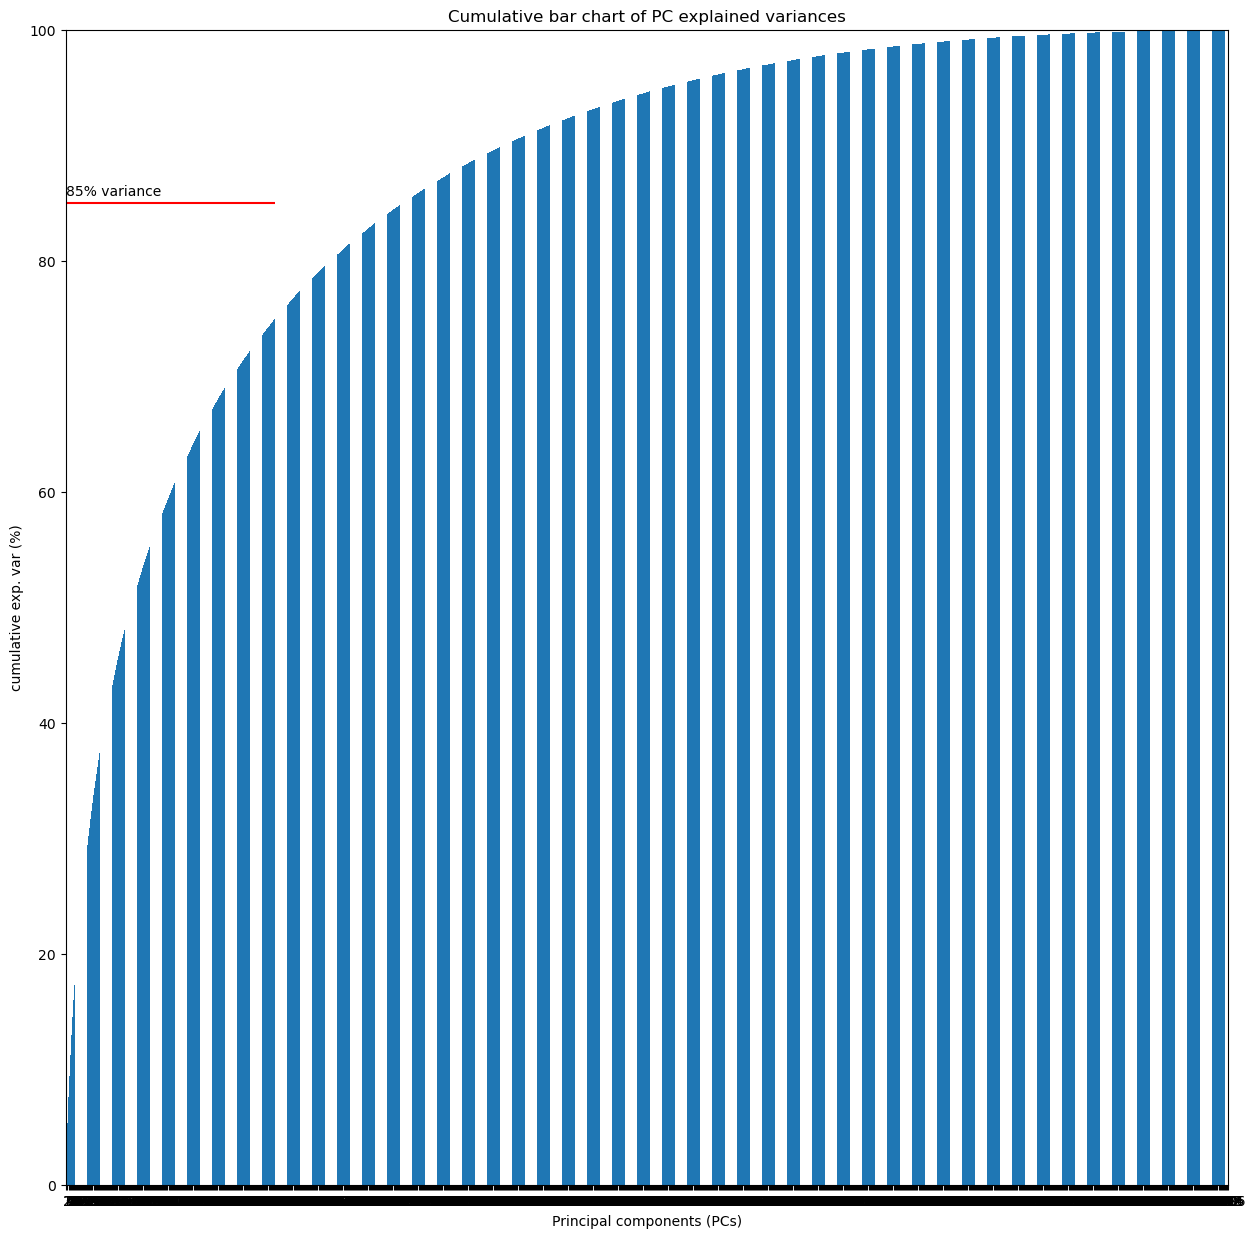

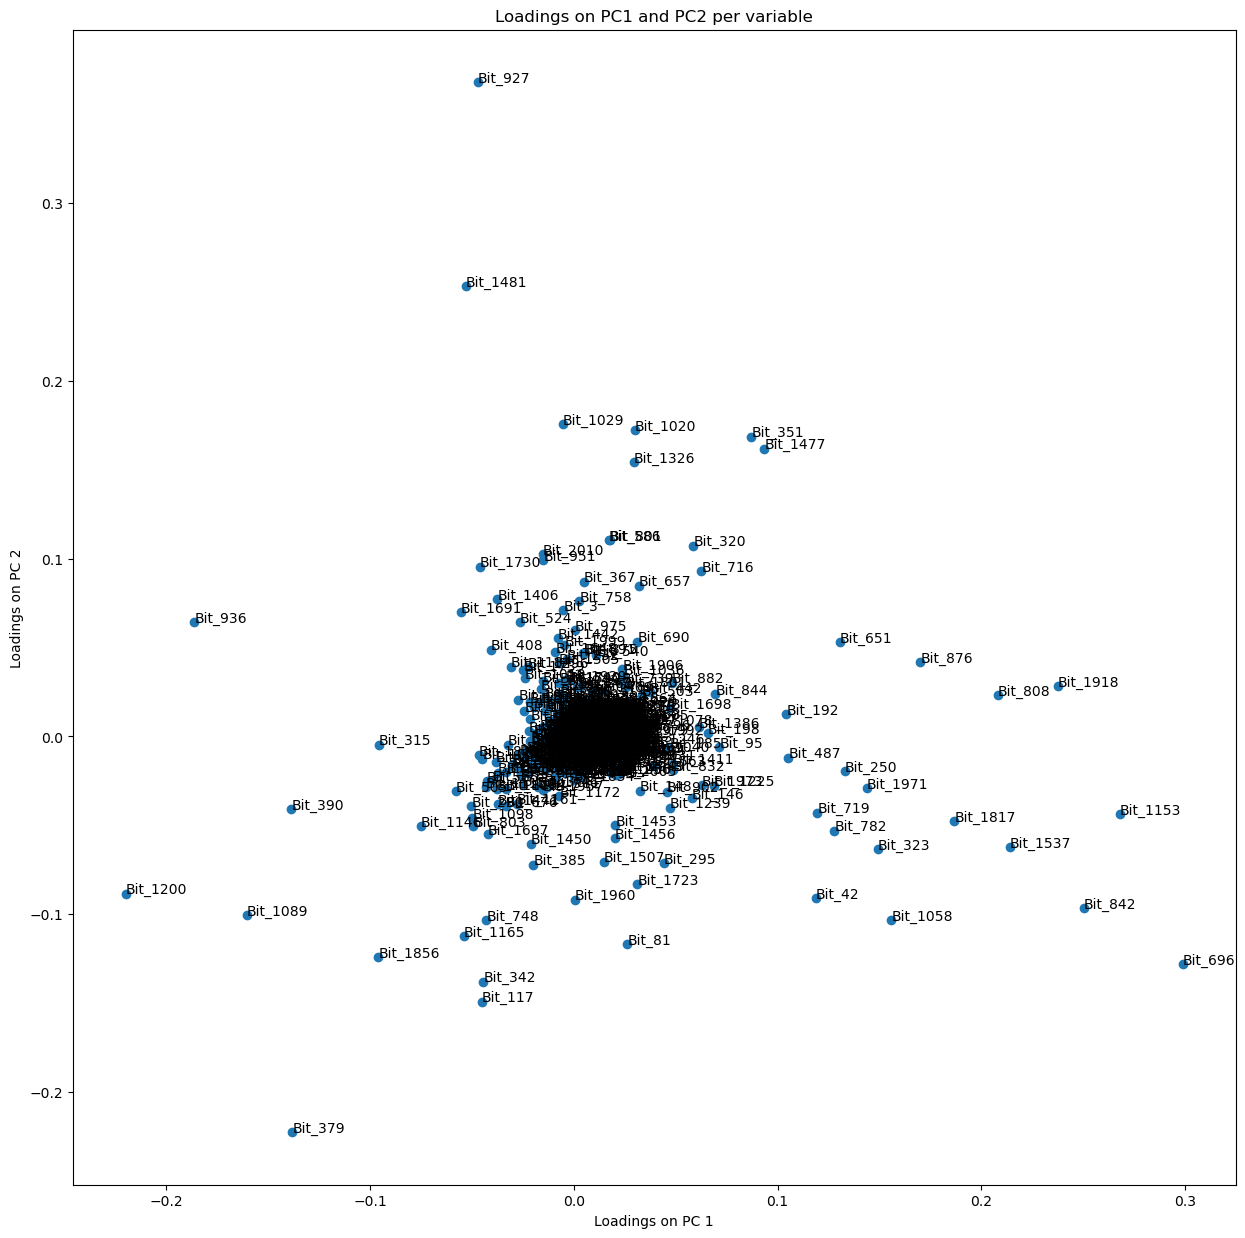

In [3]:
pca=PCA()
transformed_data=pca.fit_transform(df)
variances=pd.DataFrame(pca.explained_variance_ratio_*100)
variances.index+=1
variances.head(20)

cumulative_variances=variances.cumsum()
cumulative_variances.plot.bar(rot=0,legend=False,figsize=(15,15),ylim=(0,100))
plt.title('Cumulative bar chart of PC explained variances')
plt.ylabel('cumulative exp. var (%)')
plt.xlabel('Principal components (PCs)')
plt.hlines(xmin=0,xmax=200,y=85,color='RED')
plt.text(0, 86, '85% variance', ha='left', va='center')
#cumulative_variances.head(35) #33 PCs

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings,index=df.columns,columns=list(range(1,len(variances)+1)))

PC1_loadings=loading_matrix[1]
PC2_loadings=loading_matrix[2]
labels=df.columns
fig,ax=plt.subplots(figsize=(15,15))
ax.scatter(x=PC1_loadings,y=PC2_loadings)
ax.set_xlabel('Loadings on PC 1')
ax.set_ylabel('Loadings on PC 2')
ax.set_title('Loadings on PC1 and PC2 per variable')
for i in range(len(labels)):
    ax.annotate(labels[i],(PC1_loadings[i],PC2_loadings[i]))

In [8]:
list_of_descriptors=[]
countings={}
for PC in range(1,200):
    descriptors=loading_matrix[abs(loading_matrix[PC])>0.05][PC].index
    for descriptor in descriptors:
        if descriptor not in countings.keys():
            countings[descriptor]=float(abs(loading_matrix[loading_matrix.index==descriptor][PC]))*variances.iloc[PC-1]
        countings[descriptor]+=float(abs(loading_matrix[loading_matrix.index==descriptor][PC]))*variances.iloc[PC-1]
        if descriptor not in list_of_descriptors:
            list_of_descriptors.append(descriptor)
loading_values = pd.DataFrame.from_dict(countings,orient='index').sort_values(by=0,ascending=False)
#loading_values =  pd.DataFrame.from_dict(countings, orient='index', columns=['Loading'])
#loading_values.head(20)


C:\Users\20224085\AppData\Local\Temp\ipykernel_38112\3339418937.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  countings[descriptor]=float(abs(loading_matrix[loading_matrix.index==descriptor][PC]))*variances.iloc[PC-1]
C:\Users\20224085\AppData\Local\Temp\ipykernel_38112\3339418937.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  countings[descriptor]+=float(abs(loading_matrix[loading_matrix.index==descriptor][PC]))*variances.iloc[PC-1]


In [9]:
loading_values 
best_descriptors=loading_values.index
filtered_cleaned_descriptor_data=df[best_descriptors]

In [14]:
df_tested_mol = pd.read_csv('tested_molecules.csv')
df_molecules_with_descriptors=smiles_to_descriptors_for_df(df_tested_mol)
df_molecules_with_descriptors=df_molecules_with_descriptors.set_index('SMILES')

filtered_cleaned_descriptor_data['ERK2_inhibition']=df_molecules_with_descriptors['ERK2_inhibition'].copy()
filtered_cleaned_descriptor_data['PKM2_inhibition']=df_molecules_with_descriptors['PKM2_inhibition'].copy()
filtered_cleaned_descriptor_data.to_csv('cleaned_fingerprint_data')

[19:51:40] DEPRECATION WARNING: please use MorganGenerator
[19:51:40] DEPRECATION WARNING: please use MorganGenerator
[19:51:40] DEPRECATION WARNING: please use MorganGenerator
c:\Users\20224085\OneDrive - TU Eindhoven\jaar 2\Adv Programming\Adv.-Programming-Group-Assignment\preprocessing.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_descriptors=pd.concat([df_descriptors, new_descriptors], axis=0, ignore_index=True)
[19:51:40] DEPRECATION WARNING: please use MorganGenerator
[19:51:40] DEPRECATION WARNING: please use MorganGenerator
[19:51:40] DEPRECATION WARNING: please use MorganGenerator
[19:51:40] DEPRECATION WARNING: please use MorganGenerator
[19:51:40] DEPRECATION WARNING: please use MorganGenerator
[19:51:40] DEPRECATION WA